In [1]:
import pandas as pd
import seaborn as sns
sns.set()
import re
df = pd.read_csv("ssh_results.csv")
df.index = pd.to_datetime(df.timestamp)
df = df[df.index > "2023-11-15 12:20:00"]
df = df[df.output != "Error reading SSH protocol banner"].dropna()
df

,IP,time,output,timestamp
timestamp,,,,
2023-11-15 12:23:15.969614,130.216.216.179,10.875000,2023-11-14 23:20:02.056385: I tensorflow/core/...,2023-11-15 12:23:15.969614
2023-11-15 12:23:15.969614,130.216.216.196,10.882016,2023-11-15 12:20:02.072024: I tensorflow/core/...,2023-11-15 12:23:15.969614
2023-11-15 12:23:15.969614,130.216.216.78,98.380021,2023-11-14 23:20:01.911850: I tensorflow/core/...,2023-11-15 12:23:15.969614
2023-11-15 12:23:15.969614,130.216.217.127,10.859509,2023-11-15 12:20:01.951243: I tensorflow/core/...,2023-11-15 12:23:15.969614
2023-11-15 12:23:15.969614,130.216.216.117,10.981563,2023-11-15 12:20:02.191002: I tensorflow/core/...,2023-11-15 12:23:15.969614
...,...,...,...,...
2023-11-16 10:25:05.642720,130.216.216.179,10.863314,2023-11-15 21:20:02.611950: I tensorflow/core/...,2023-11-16 10:25:05.642720
2023-11-16 10:25:05.642720,130.216.216.196,10.817995,2023-11-16 10:20:02.446423: I tensorflow/core/...,2023-11-16 10:25:05.642720
2023-11-16 10:25:05.642720,130.216.216.78,98.297923,2023-11-15 21:20:02.585795: I tensorflow/core/...,2023-11-16 10:25:05.642720


In [2]:
# Extract some metrics from the output
def parse_time_to_seconds(time_str):
    minutes, seconds = map(float, time_str.split('m'))
    return minutes * 60 + seconds
df["nvidia-smi_time"] = df.output.str.extract(r'real\s+(.+)s')[0].apply(parse_time_to_seconds)
df["tf_devices_time"] = df.output.str.extract(r'Took (\d+)s').astype(int)
df["serials"] = df.output.str.findall(r'Serial Number\s*:\s*([^:]+)\n').apply(lambda s: ", ".join(s))
df["product names"] = df.output.str.findall("^    Product Name\s*:\s*([^:]+)$", re.MULTILINE).apply(lambda s: ", ".join(s))
df["bitshift"] = (df["product names"] == "Unknown Error")
df["persistence"] = df.output.str.extract(r'Persistence Mode\s*:\s*(.+)\n')
df["tf_detected_GPUs"] = df.output.str.findall(r"physical_device:(GPU:\d)', device_type='GPU'").str.len()
df

,IP,time,output,timestamp,nvidia-smi_time,tf_devices_time,serials,product names,bitshift,persistence,tf_detected_GPUs
timestamp,,,,,,,,,,,
2023-11-15 12:23:15.969614,130.216.216.179,10.875000,2023-11-14 23:20:02.056385: I tensorflow/core/...,2023-11-15 12:23:15.969614,0.119,0,1322122007252,NVIDIA A100 80GB PCIe,False,Enabled,1
2023-11-15 12:23:15.969614,130.216.216.196,10.882016,2023-11-15 12:20:02.072024: I tensorflow/core/...,2023-11-15 12:23:15.969614,0.120,0,1652422032676,NVIDIA A100 80GB PCIe,False,Enabled,1
2023-11-15 12:23:15.969614,130.216.216.78,98.380021,2023-11-14 23:20:01.911850: I tensorflow/core/...,2023-11-15 12:23:15.969614,87.588,96,1322822261453,Unknown Error,True,Enabled,0
2023-11-15 12:23:15.969614,130.216.217.127,10.859509,2023-11-15 12:20:01.951243: I tensorflow/core/...,2023-11-15 12:23:15.969614,0.213,0,"1652422032681, 1322122007042","NVIDIA A100 80GB PCIe, NVIDIA A100 80GB PCIe",False,Enabled,2
2023-11-15 12:23:15.969614,130.216.216.117,10.981563,2023-11-15 12:20:02.191002: I tensorflow/core/...,2023-11-15 12:23:15.969614,0.274,0,"1323022014403, 1323022014449","NVIDIA A100 80GB PCIe, NVIDIA A100 80GB PCIe",False,Enabled,2
...,...,...,...,...,...,...,...,...,...,...,...
2023-11-16 10:25:05.642720,130.216.216.179,10.863314,2023-11-15 21:20:02.611950: I tensorflow/core/...,2023-11-16 10:25:05.642720,0.121,0,1322122007252,NVIDIA A100 80GB PCIe,False,Enabled,1
2023-11-16 10:25:05.642720,130.216.216.196,10.817995,2023-11-16 10:20:02.446423: I tensorflow/core/...,2023-11-16 10:25:05.642720,0.244,0,1652422032676,NVIDIA A100 80GB PCIe,False,Enabled,1
2023-11-16 10:25:05.642720,130.216.216.78,98.297923,2023-11-15 21:20:02.585795: I tensorflow/core/...,2023-11-16 10:25:05.642720,87.580,93,1322822261453,NVIDIA A100 80GB PCIe,False,Enabled,0


In [3]:
df[df.serials == "1322822261453"]

,IP,time,output,timestamp,nvidia-smi_time,tf_devices_time,serials,product names,bitshift,persistence,tf_detected_GPUs
timestamp,,,,,,,,,,,
2023-11-15 12:23:15.969614,130.216.216.78,98.380021,2023-11-14 23:20:01.911850: I tensorflow/core/...,2023-11-15 12:23:15.969614,87.588,96,1322822261453,Unknown Error,True,Enabled,0
2023-11-15 12:28:15.826631,130.216.216.78,98.332177,2023-11-14 23:25:02.018019: I tensorflow/core/...,2023-11-15 12:28:15.826631,87.500,96,1322822261453,Unknown Error,True,Enabled,0
2023-11-15 12:33:16.936067,130.216.216.78,98.263673,2023-11-14 23:30:02.786933: I tensorflow/core/...,2023-11-15 12:33:16.936067,87.500,96,1322822261453,NVIDIA A100 80GB PCIe,False,Enabled,0
2023-11-15 12:38:16.938510,130.216.216.78,98.288401,2023-11-14 23:35:02.903870: I tensorflow/core/...,2023-11-15 12:38:16.938510,87.516,96,1322822261453,Unknown Error,True,Enabled,0
2023-11-15 12:43:16.183741,130.216.216.78,98.102042,2023-11-14 23:40:02.154929: I tensorflow/core/...,2023-11-15 12:43:16.183741,87.497,90,1322822261453,Unknown Error,True,Enabled,0
...,...,...,...,...,...,...,...,...,...,...,...
2023-11-16 09:58:16.438551,130.216.216.78,98.476514,2023-11-15 20:55:02.491003: I tensorflow/core/...,2023-11-16 09:58:16.438551,87.585,96,1322822261453,NVIDIA A100 80GB PCIe,False,Enabled,0
2023-11-16 10:03:16.758911,130.216.216.78,98.216722,2023-11-15 21:00:02.875874: I tensorflow/core/...,2023-11-16 10:03:16.758911,87.484,72,1322822261453,Unknown Error,True,Enabled,0
2023-11-16 10:08:16.176531,130.216.216.78,98.361380,2023-11-15 21:05:02.219995: I tensorflow/core/...,2023-11-16 10:08:16.176531,87.588,90,1322822261453,Unknown Error,True,Enabled,0


In [4]:
df[df.serials == "1322822261453"].bitshift.value_counts()

True     103
False     98
Name: bitshift, dtype: int64

serials
1322122007252                   AxesSubplot(0.125,0.2;0.775x0.68)
1322822261453                   AxesSubplot(0.125,0.2;0.775x0.68)
1323022014403, 1323022014449    AxesSubplot(0.125,0.2;0.775x0.68)
1323022015019                   AxesSubplot(0.125,0.2;0.775x0.68)
1652422032676                   AxesSubplot(0.125,0.2;0.775x0.68)
1652422032681, 1322122007042    AxesSubplot(0.125,0.2;0.775x0.68)
Name: nvidia-smi_time, dtype: object

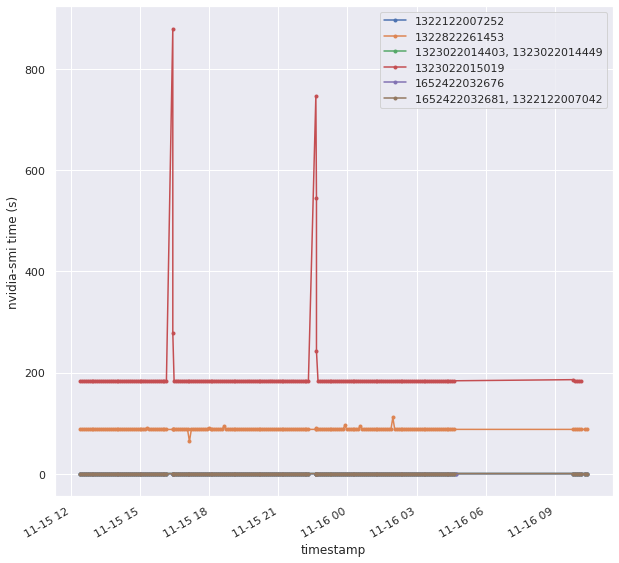

In [5]:
df.groupby("serials")["nvidia-smi_time"].plot(legend=True, figsize=(10,10), style=".-", ylabel="nvidia-smi time (s)")

In [6]:
df.groupby("serials")["nvidia-smi_time"].describe()

,count,mean,std,min,25%,50%,75%,max
serials,,,,,,,,
1322122007252,202.0,0.119238,0.002490,0.114,0.118,0.119,0.1200,0.135
1322822261453,201.0,87.689189,2.534669,63.976,87.508,87.538,87.5690,111.215
"1323022014403, 1323022014449",201.0,0.275109,0.008332,0.256,0.269,0.274,0.2810,0.313
1323022015019,199.0,192.786829,68.476696,183.744,183.808,183.845,183.8955,880.397
1652422032676,201.0,0.107721,0.011557,0.098,0.103,0.105,0.1130,0.244
"1652422032681, 1322122007042",201.0,0.214075,0.009434,0.203,0.210,0.212,0.2140,0.274
